# Editing models with pygor3

A default model can be edited with IGoR from an already defined model. If you want to do it from scratch you need to IGoR C++ source code

In [11]:
import pygor3 as p3
species="human"
chain="tcr_beta"
mdl = p3.IgorModel.load_default(species, chain)

Loading default IGoR model from path :  /home/alfaceor/.local/share/igor/models/human/tcr_beta/
Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------


## Changing Edges

Exporting model parms in file  mdl_parms0.txt
Exporting model marginals in file  mdl_marginals0.txt


<AxesSubplot:>

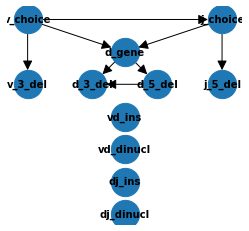

In [12]:
mdl.parms.write_model_parms("mdl_parms0.txt")
mdl.marginals.write_model_marginals("mdl_marginals0.txt", model_parms=mdl.parms)
mdl.parms.plot_Graph()

In [7]:
mdl['vd_ins']

<xarray.DataArray (vd_ins: 31)>
array([4.35094e-02, 4.52818e-02, 1.03509e-01, 1.20815e-01, 1.57023e-01,
       1.05497e-01, 8.40290e-02, 7.83653e-02, 5.68835e-02, 5.48993e-02,
       3.86246e-02, 3.54925e-02, 2.02105e-02, 1.92853e-02, 1.03827e-02,
       6.84924e-03, 4.88492e-03, 4.36633e-03, 2.46267e-03, 2.73884e-03,
       5.42621e-04, 1.46427e-03, 9.83047e-04, 9.36636e-04, 1.31972e-04,
       3.10250e-04, 2.60741e-04, 1.25265e-04, 1.92298e-09, 0.00000e+00,
       1.35988e-04])
Coordinates:
  * vd_ins       (vd_ins) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29 30
    lbl__vd_ins  (vd_ins) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29 30
Attributes:
    nickname:    vd_ins
    event_type:  Insertion
    seq_type:    VD_genes
    seq_side:    Undefined_side
    priority:    4
    parents:     []
    childs:      []

Exporting model parms in file  mdl_parms1.txt
Exporting model marginals in file  mdl_marginals1.txt


<AxesSubplot:>

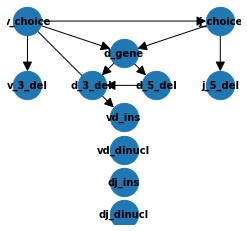

In [13]:
mdl.parms.add_Egde('v_choice', 'vd_ins')
mdl.parms.write_model_parms("mdl_parms1.txt")
mdl.marginals.initialize_uniform_from_model_parms(mdl.parms)
mdl.marginals.write_model_marginals("mdl_marginals1.txt", model_parms=mdl.parms)
mdl.parms.plot_Graph()

Exporting model parms in file  mdl_parms3.txt
Exporting model marginals in file  mdl_marginals3.txt


<AxesSubplot:>

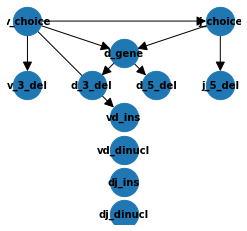

In [5]:
mdl.parms.remove_Edge('d_5_del', 'd_3_del')
mdl.parms.write_model_parms("mdl_parms3.txt")
mdl.marginals.initialize_uniform_from_model_parms(mdl.parms)
mdl.marginals.write_model_marginals("mdl_marginals3.txt", model_parms=mdl.parms)
mdl.parms.plot_Graph()

## Changing Event realizations

Loading default IGoR model from path :  /home/alfaceor/.local/share/igor/models/mouse/tcr_beta/
Parms filename:  /home/alfaceor/.local/share/igor/models/mouse/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/mouse/tcr_beta/models/model_marginals.txt
--------------------------------------------------


<AxesSubplot:>

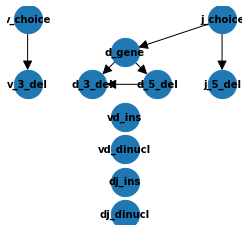

In [15]:
import pygor3 as p3
species="mouse"
chain="tcr_beta"
mdl = p3.IgorModel.load_default(species, chain)
mdl.parms.plot_Graph()

In [16]:
mdl['d_gene']

<xarray.DataArray (j_choice: 14, d_gene: 2)>
array([[9.97119e-01, 2.88075e-03],
       [9.91182e-01, 8.81843e-03],
       [9.99812e-01, 1.87606e-04],
       [9.99621e-01, 3.78589e-04],
       [9.97135e-01, 2.86515e-03],
       [9.93902e-01, 6.09815e-03],
       [0.00000e+00, 0.00000e+00],
       [5.02666e-01, 4.97334e-01],
       [6.20184e-01, 3.79816e-01],
       [5.45690e-01, 4.54310e-01],
       [5.22695e-01, 4.77305e-01],
       [5.28208e-01, 4.71792e-01],
       [0.00000e+00, 0.00000e+00],
       [5.10279e-01, 4.89721e-01]])
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
    lbl__j_choice  (j_choice) object 'TRBJ1-1*01' 'TRBJ1-2*01' ... 'TRBJ2-7*01'
    seq__j_choice  (j_choice) object 'CAAACACAGAAGTCTTCTTTGGTAAAGGAACCAGACTCA...
  * d_gene         (d_gene) int64 0 1
    lbl__d_gene    (d_gene) object 'TRBD1*01' 'TRBD2*01'
    seq__d_gene    (d_gene) object 'GGGACAGGGGGC' 'GGGACTGGGGGGGC'
Attributes:
    nickname:    d_gene
    event_type:  GeneChoice
    seq_type:    D_gene
    seq_side:    Undefined_side
    priority:    6
    parents:     ['j_choice']
    childs:      ['d_3_del', 'd_5_del']

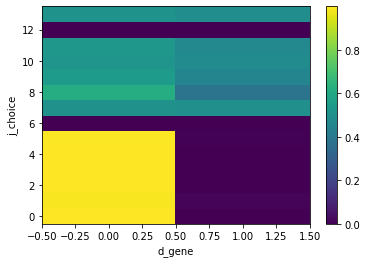

In [17]:
mdl['d_gene'].plot()

In [18]:
df = mdl.get_event_realizations_DataFrame('j_choice')
df

,value,name
id,,
0,CAAACACAGAAGTCTTCTTTGGTAAAGGAACCAGACTCACAGTTGTAG,TRBJ1-1*01
1,CAAACTCCGACTACACCTTCGGCTCAGGGACCAGGCTTTTGGTAATAG,TRBJ1-2*01
2,TTCTGGAAATACGCTCTATTTTGGAGAAGGAAGCCGGCTCATTGTT...,TRBJ1-3*01
3,TTTCCAACGAAAGATTATTTTTCGGTCATGGAACCAAGCTGTCTGT...,TRBJ1-4*01
4,TAACAACCAGGCTCCGCTTTTTGGAGAGGGGACTCGACTCTCTGTT...,TRBJ1-5*01
5,TTCCTATAATTCGCCCCTCTACTTTGCGGCAGGCACCCGGCTCACT...,TRBJ1-6*01
6,CCTGTGTTGGATGACCATGGTCTTGGAAAGGAACTTAGGTATAAGA,TRBJ1-7*01
7,TAACTATGCTGAGCAGTTCTTCGGACCAGGGACACGACTCACCGTC...,TRBJ2-1*01
8,CAAACACCGGGCAGCTCTACTTTGGTGAAGGCTCAAAGCTGACAGT...,TRBJ2-2*01


Now we can simple edit this dataframe 

In [19]:
new_df = df[:4]
new_df

,value,name
id,,
0,CAAACACAGAAGTCTTCTTTGGTAAAGGAACCAGACTCACAGTTGTAG,TRBJ1-1*01
1,CAAACTCCGACTACACCTTCGGCTCAGGGACCAGGCTTTTGGTAATAG,TRBJ1-2*01
2,TTCTGGAAATACGCTCTATTTTGGAGAAGGAAGCCGGCTCATTGTT...,TRBJ1-3*01
3,TTTCCAACGAAAGATTATTTTTCGGTCATGGAACCAAGCTGTCTGT...,TRBJ1-4*01


and set it as the new realizations for this particular event and for our model

In [21]:
mdl.set_realization_event_from_DataFrame('j_choice', new_df)

In [22]:
mdl.parms.write_model_parms("mdl_parms3.txt")
mdl.marginals.write_model_marginals("mdl_marginals3.txt", model_parms=mdl.parms)


Exporting model parms in file  mdl_parms3.txt
Exporting model marginals in file  mdl_marginals3.txt


In [20]:
mdl['j_choice'][0]=1
mdl['j_choice']

<xarray.DataArray (j_choice: 4)>
array([1.  , 0.25, 0.25, 0.25])
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3
    lbl__j_choice  (j_choice) object 'TRBJ1-1*01' 'TRBJ1-2*01' ... 'TRBJ1-4*01'
    seq__j_choice  (j_choice) object 'CAAACACAGAAGTCTTCTTTGGTAAAGGAACCAGACTCA...
Attributes:
    nickname:    j_choice
    event_type:  GeneChoice
    seq_type:    J_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['j_5_del', 'd_gene']

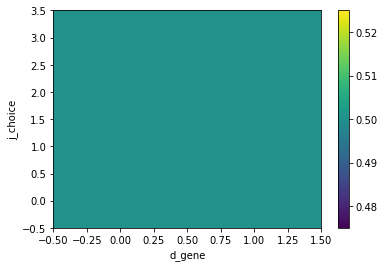

In [21]:
mdl['d_gene'].plot()

Loading default IGoR model from path :  /home/alfaceor/.local/share/igor/models/human/tcr_beta/
Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------


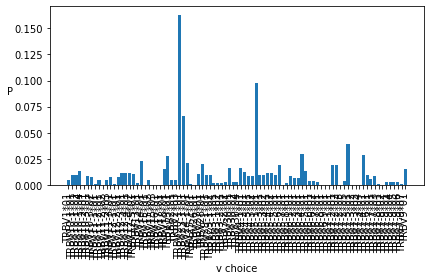

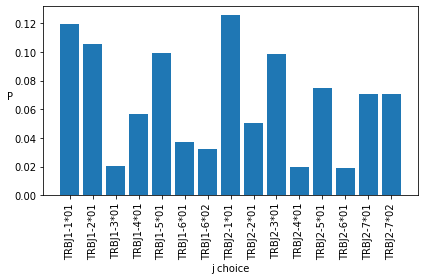

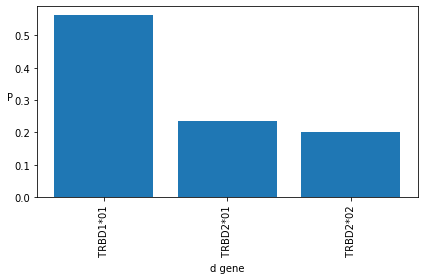

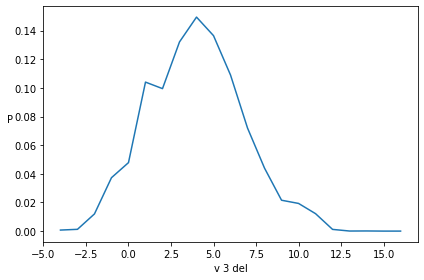

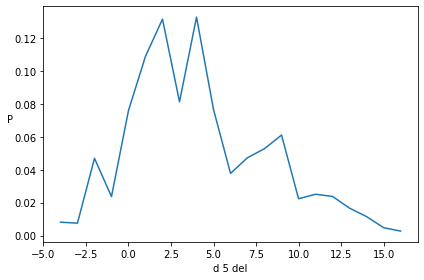

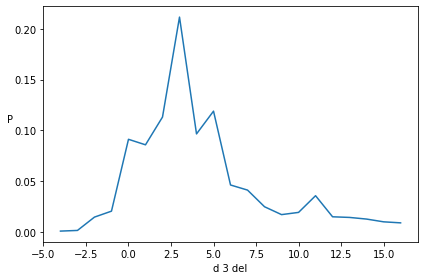

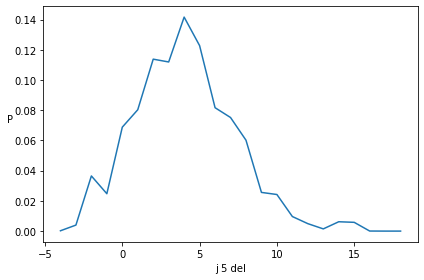

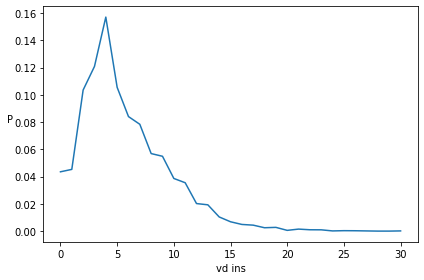

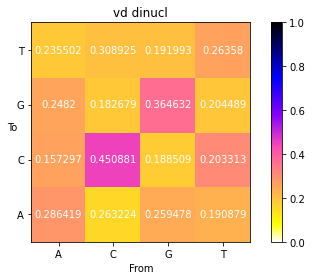

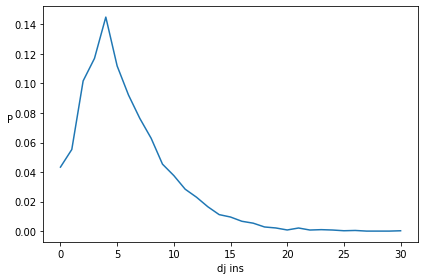

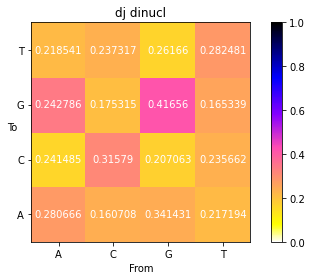

In [2]:
import pygor3 as p3
mdl_HTRB = p3.IgorModel.load_default("human", "tcr_beta")
mdl_HTRB.export_plot_Pmarginals("OOO")

## Making new model parms from IMGT website

### Downloading IMGT templates

In [1]:
import pygor3 as p3
p3.imgt.imgt_params

{'url.home': 'http://www.imgt.org',
 'url.genelist': 'http://www.imgt.org/download/GENE-DB/IMGTGENEDB-GeneList',
 'url.genedb': 'http://www.imgt.org/genedb/GENElect?',
 'url.release': 'http://www.imgt.org/download/GENE-DB/RELEASE',
 'url.readme': 'http://www.imgt.org/download/GENE-DB/README.txt',
 'Genesymbol': [],
 'data.chainlist': ['TRA', 'TRB', 'BCR']}

In [6]:
imgt_species_list = p3.imgt.get_species_list()
print( imgt_species_list )

['', 'Ornithorhynchus+anatinus', 'Rattus+rattus', 'Mus+minutoides', 'Danio+rerio', 'Rattus+norvegicus', 'Equus+caballus', 'Papio+anubis+anubis', 'Capra+hircus', 'Mustela+putorius+furo', 'Camelus+dromedarius', 'Mus+cookii', 'Mus+spretus', 'Oncorhynchus+mykiss', 'Cercocebus+atys', 'Vicugna+pacos', 'Mus+saxicola', 'Sus+scrofa', 'Ovis+aries', 'Canis+lupus+familiaris', 'Bos+taurus', 'Mus+musculus', 'Macaca+nemestrina', 'Tursiops+truncatus', 'Felis+catus', 'Macaca+fascicularis', 'Mus+pahari', 'Homo+sapiens', 'Gallus+gallus', 'Salmo+salar', 'Oryctolagus+cuniculus', 'Macaca+mulatta']


In [3]:
import pygor3 as p3
imgt_species = "Bos+taurus"
imgt_chain = "TRA"
p3.imgt.download_ref_genome_VDJ(imgt_species, imgt_chain)

Bos+taurus TRAV http://www.imgt.org/genedb/GENElect?query=7.2+TRAV&species=Bos+taurus
http://www.imgt.org/genedb/GENElect?query=7.2+TRAV&species=Bos+taurus
Bos+taurus TRAD http://www.imgt.org/genedb/GENElect?query=7.2+TRAD&species=Bos+taurus
http://www.imgt.org/genedb/GENElect?query=7.2+TRAD&species=Bos+taurus
Bos+taurus TRAJ http://www.imgt.org/genedb/GENElect?query=7.2+TRAJ&species=Bos+taurus
http://www.imgt.org/genedb/GENElect?query=7.2+TRAJ&species=Bos+taurus
Genomic VDJ templates in files:  models/Bos+taurus/TRA/ref_genome/genomicVs__imgt.fasta models/Bos+taurus/TRA/ref_genome/genomicDs__imgt.fasta models/Bos+taurus/TRA/ref_genome/genomicJs__imgt.fasta
{}
http://www.imgt.org/genedb/GENElect?query=8.1+TRAV&species=Bos+taurus&IMGTlabel=2nd-CYS
No anchor is found for : IMGT000049|TRAV10-1*01|Bos taurus_Hereford|P|V-REGION|491414..491602|189 nt|1| | | | |189+0=189|partial in 3'| |
No anchor is found for : IMGT000049|TRAV11-3*01|Bos taurus_Hereford|P|V-REGION|2783132..2783410|279 nt|1|

In [ ]:
tas

In [4]:
# Now make a IGoR model
model_dir_path = "models/"+imgt_species+"/"+imgt_chain
path_ref_genome = model_dir_path+"/ref_genome"
!ls {model_dir_path}

models	ref_genome


In [3]:
import pygor3 as p3
tasss = p3.IgorTask()
tasss.to_dict()
# tasss.genomes.df_genomicDs

{'igor_species': None,
 'igor_chain': None,
 'igor_model_dir_path': None,
 'igor_path_ref_genome': '',
 'fln_genomicVs': '',
 'fln_genomicDs': '',
 'fln_genomicJs': '',
 'fln_V_gene_CDR3_anchors': '',
 'igor_wd': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks',
 'igor_batchname': 'dataIGoRHZ1q17HCSQ',
 'igor_model_parms_file': '',
 'igor_model_marginals_file': '',
 'igor_read_seqs': '',
 'igor_threads': '',
 'igor_fln_indexed_sequences': '',
 'igor_fln_indexed_CDR3': '',
 'igor_fln_align_V_alignments': '',
 'igor_fln_align_J_alignments': '',
 'igor_fln_align_D_alignments': '',
 'igor_fln_infer_final_marginals': '',
 'igor_fln_infer_final_parms': '',
 'igor_fln_evaluate_final_marginals': '',
 'igor_fln_evaluate_final_parms': '',
 'igor_fln_output_pgen': '',
 'igor_fln_output_scenarios': '',
 'igor_fln_output_coverage': '',
 'igor_fln_generated_realizations_werr': '',
 'igor_fln_generated_seqs_werr': '',
 'igor_fln_generation_info': '',
 'igor_fln_db': '',
 'b_read_seq

In [5]:
#tasss.make_default_VDJ()

In [6]:
mdl_reference = p3.IgorModel.load_default("human","tcr_beta")
mdl_reference.parms.ErrorRate_dict

Loading default IGoR model from path :  /home/alfaceor/.local/share/igor/models/human/tcr_beta/
Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------


{'error_type': 'SingleErrorRate', 'error_values': '0.000396072'}

In [7]:
# p3.IgorRec_Event_default_dict
p3.IgorRec_Event_default_dict['v_choice']

{'event_type': 'GeneChoice',
 'seq_type': 'V_gene',
 'seq_side': 'Undefined_side',
 'priority': 7,
 'realizations': [],
 'name': '',
 'nickname': 'v_choice'}

In [23]:
# TODO: ADD FILENAME AND DIRE


In [32]:
# From this MDL CREATE A PARMS AND MARGINALS
mdl.parms.write_model_parms('don.txt')
mdl.marginals.write_model_marginals('don_ma.txt', mdl.parms)

Exporting model parms in file  don.txt
Exporting model marginals in file  don_ma.txt


In [23]:
p3.imgt.download_gene_template('Homo+sapiens', 'TRAV')

Homo+sapiens TRAV http://www.imgt.org/genedb/GENElect?query=7.2+TRAV&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRAV&species=Homo+sapiens


'models/Homo+sapiens/TRA/ref_genome/genomicVs__imgt.fasta'

In [18]:
!ls models/Homo+sapiens/TRA/ref_genome

genomicVs__imgt.fasta


In [22]:
!head models/Homo+sapiens/TRA/ref_genome/genomicVs__imgt.fasta


>AE000658|TRAV1-1*01|Homo sapiens|F|V-REGION|128090..128364|275 nt|1| | | | |275+0=275| | |
GGACAAAGCCTTGAGCAGCCCTCTGAAGTGACAGCTGTGGAAGGAGCCATTGTCCAGATA
AACTGCACGTACCAGACATCTGGGTTTTATGGGCTGTCCTGGTACCAGCAACATGATGGC
GGAGCACCCACATTTCTTTCTTACAATGCTCTGGATGGTTTGGAGGAGACAGGTCGTTTT
TCTTCATTCCTTAGTCGCTCTGATAGTTATGGTTACCTCCTTCTACAGGAGCTCCAGATG
AAAGACTCTGCCTCTTACTTCTGCGCTGTGAGAGA
>X04939|TRAV1-1*02|Homo sapiens|(F)|V-REGION|52..320|269 nt|1| | | | |269+0=269| | |
GGACAAAGCCTTGAGCAGCCCTCTGAAGTGACAGCTGTGGAAGGAGCCATTGTCCAGATA
AACTGCACGTACCAGACATCTGGGTTTTATGGGCTGTCCTGGTACCAGCAACATGATGGC
GGAGCACCCACATTTCTTTCTTACAATGGTCTGGATGGTTTGGAGGAGACAGGTCGTTTT
